## Data exploration V2
En este notebook hay un análisis un poco más avanzado del presentado en el notebook `data_exploration.ipynb`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
names_prods = ['Saving Accounts', 'Guarantees', 'Current Accounts', 'Derivada Account', 'Payroll Account', 'Junior Account',
               'Más particular Account', 'Particular Account', 'Particular Plus Account', 'Short-term deposits',
               'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds', 'Mortgage', 'Pensions', 'Loans', 'Taxes',
               'Credit Card', 'Securities', 'Home Account', 'Payroll', 'Pensions', 'Direct Debit']

### Carga de datos de entrenamiento y test

In [3]:
%%time
df = pd.read_csv('data/train_ver2.csv',
                 dtype={'sexo': str, 'age': str, 'ind_nuevo': str, 'indrel_1mes': str, 
                        'antiguedad': str, 'ult_fec_cli_lt': str, 'indext': str, 'conyuemp': str},
                 parse_dates=['fecha_dato', 'fecha_alta'])
df.head()

CPU times: user 3min 5s, sys: 12.5 s, total: 3min 17s
Wall time: 3min 17s


In [4]:
%%time
df_test = pd.read_csv('data/test_ver2.csv',
                 dtype={'sexo': str, 'age': str, 'ind_nuevo': str, 'indrel_1mes': str, 
                        'antiguedad': str, 'ult_fec_cli_lt': str, 'indext': str, 'conyuemp': str},
                 parse_dates=['fecha_dato', 'fecha_alta'])
df_test.head()

CPU times: user 9.82 s, sys: 112 ms, total: 9.93 s
Wall time: 9.93 s


In [5]:
df.shape, df_test.shape

((13647309, 48), (929615, 24))

### Exploración de productos por mes

In [6]:
products = df.loc[:, ['fecha_dato']].join(df.loc[:, 'ind_ahor_fin_ult1':])

In [7]:
products.shape

(13647309, 25)

##### Cantidad de productos cada mes

In [8]:
df_a = products.groupby(['fecha_dato']).sum()

In [9]:
#Descripción de los productos
descr_prods = {}
for i, p in enumerate(names_prods):
    descr_prods[df_a.columns.tolist()[i]] = { 'num': str(i+1), 'name': p }

In [10]:
dates = [d.strftime("%b %Y") for d in df_a.index]

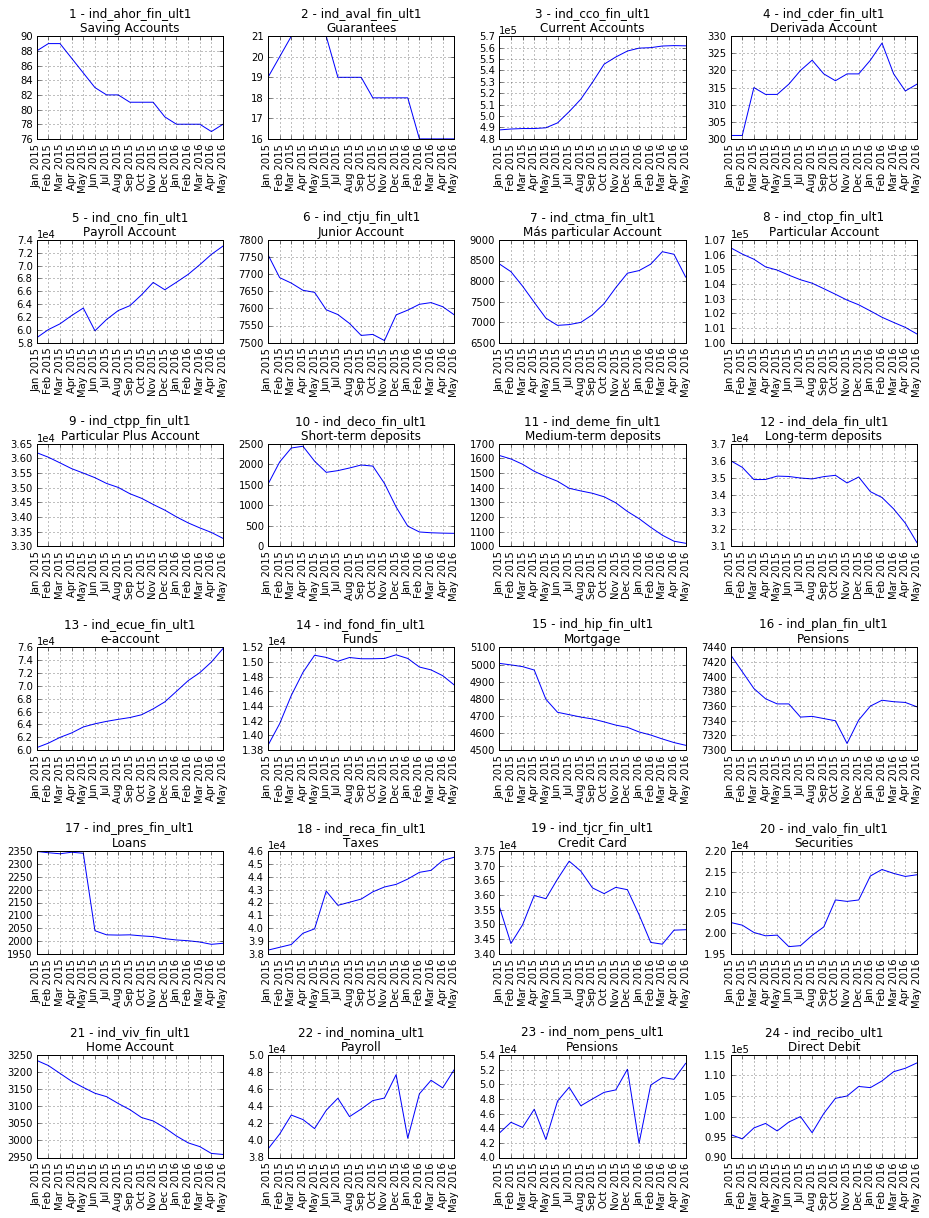

In [11]:
fig, axes = plt.subplots(6, 4, sharex=False, figsize=(13, 17))
axs = [j for i in axes for j in i]
for i, col in enumerate(df_a.columns):
    serie = df_a.loc[:, col]
    ax = axs[i]
    ax.plot(serie.values)
    ax.set_title(descr_prods[col]['num'] + " - " + str(col) + '\n' + descr_prods[col]['name'])
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=90)
    ax.grid()
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 4))
plt.tight_layout(h_pad=2)

### Compras y "abandonos" de productos por mes
En esta sección se mira el comportamiento de compra y abandono de cada producto por mes

In [12]:
df_b = pd.DataFrame(columns=df_a.columns.tolist()[0:]) #dataframe products prev bought
for i in range(1, len(dates)):
    prev_prods = df_a.loc[df_a.index[i-1]].as_matrix()
    act_prods = df_a.loc[df_a.index[i]].as_matrix()
    bought_prods = act_prods - prev_prods
    df_b.loc[i] = bought_prods

In [13]:
df_b = df_a.reset_index().loc[:, ['fecha_dato']].join(df_b).iloc[1:]
df_b = df_b.set_index('fecha_dato')

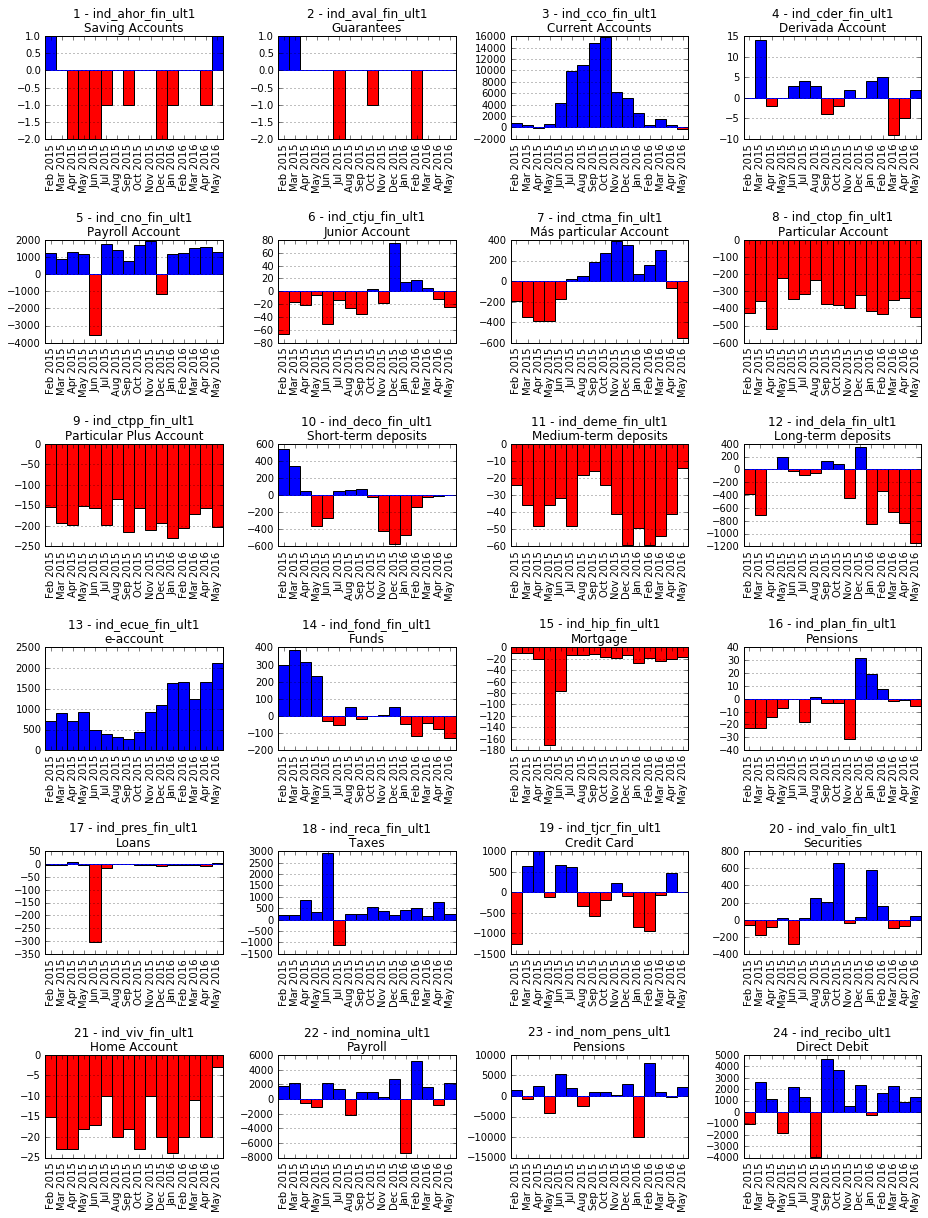

In [14]:
fig, axes = plt.subplots(6, 4, sharex=False, figsize=(13, 17))
axs = [j for i in axes for j in i]
for i, col in enumerate(df_b.columns):
    serie = df_b.loc[:, col]
    ax = axs[i]
    colors = list(map(lambda x: 'r' if x < 0 else 'b', serie.values))
    ax.bar(np.arange(len(serie)), serie, color=colors, width=1, align='center')
    #ax.plot(serie.values, c='r', linewidth=1.5)
    ax.set_title(descr_prods[col]['num'] + " - " + str(col) + '\n' + descr_prods[col]['name'])
    ax.set_xticks(range(len(dates[1:])))
    ax.set_xticklabels(dates[1:], rotation=90)
    ax.set_xlim(-0.5, len(serie.values)-0.5)
    ax.axhline()
    ax.grid(axis='y')
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 4))
plt.tight_layout(h_pad=2)

### Top 10 productos que los clientes tienen

In [15]:
top_products = [i for i in reversed(df_a.mean().sort_values()[-10:].index)]

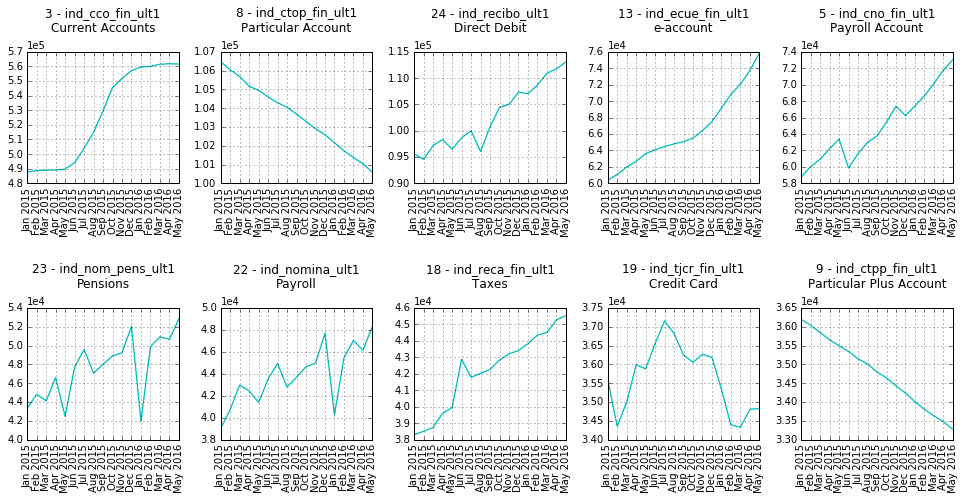

In [16]:
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(13.5, 7))
axs = [j for i in axes for j in i]
for i, col in enumerate(top_products):
    serie = df_a.loc[:, col]
    ax = axs[i]
    ax.plot(serie.values, linewidth=1.3, c='c')
    ax.set_title(descr_prods[col]['num'] + " - " + str(col) + '\n' + descr_prods[col]['name'] + '\n')
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=90)
    #ax.axhline()
    ax.grid()
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 4))
plt.tight_layout(h_pad=3)

### Top 10 productos más comprados

In [17]:
df_c = df_b.copy()
df_c[df_c < 0] = 0
top_purchases = df_c.mean().sort_values(ascending=False)[:10].index

In [67]:
dates[5] == 'Jun 2015'

True

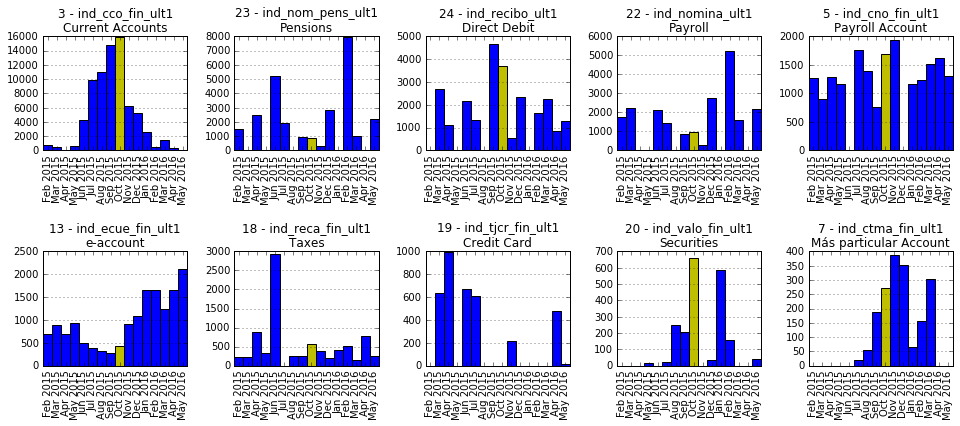

In [136]:
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(13.5, 6))
axs = [j for i in axes for j in i]
for i, col in enumerate(top_purchases):
    serie = df_c.loc[:, col]
    ax = axs[i]
    #colors = list(map(lambda x: 'r' if x < 0 else 'b', serie.values))
    colors = list(map(lambda x: 'y' if x == 'Oct 2015' else 'b', dates[1:]))
    ax.bar(np.arange(len(serie)), serie, color=colors, width=1, align='center')
    #ax.plot(serie.values, c='r', linewidth=1.5)
    ax.set_title(descr_prods[col]['num'] + " - " + str(col) + '\n' + descr_prods[col]['name'])
    ax.set_xticks(range(len(dates[1:])))
    ax.set_xticklabels(dates[1:], rotation=90)
    ax.set_xlim(-0.5, len(serie.values)-0.5)
    ax.axhline()
    ax.grid(axis='y')
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 4))
plt.tight_layout(h_pad=2)

### Porcentaje de clientes que compran un nuevo producto 
En esta sección se hace el cálculo correspondiente para ver la cantidad de clientes que adquieren al menos un producto el siguiente mes, se tienen en cuenta dos grupos de clientes, los clientes antiguos (que están en ambos meses del análisis) y los clientes nuevos que hayan adquirido al menos un producto

**NOTA:** Los clientes que presentaban _Nan_ en sus productos se reemplazó por cero

In [11]:
df_clean = pd.read_csv('data/clean/train_clean.csv')
df_targets_clean = pd.read_csv('data/clean/train_labels.csv')

In [12]:
df_targets_clean[['ind_nomina_ult1', 'ind_nom_pens_ult1']] = df_targets_clean[['ind_nomina_ult1', 'ind_nom_pens_ult1']].astype('int64')

In [13]:
dts = [d.strftime("%Y-%m-%d") for d in df_a.index][:-1]
dts1 = [d.strftime("%Y-%m-%d") for d in df_a.index][1:]

In [14]:
tuples_dates = list(zip(dts, dts1))

#### Teniendo en cuenta únicamente los clientes que están en ambos meses

In [16]:
print("{0:10}|{1:^41}|{2:^41}|".format('', 'Dataset original', 'Dataset "clean"'))
print("{0:^10}|{1:^14}|{2:^14}|{3:^11}|{1:^14}|{2:^14}|{3:^11}|".format('Fecha', 'Cant clientes','Cant compras','Max score'))
print("-"*10 + "|" + "-"*41 + "|" + "-"*41 + "|")
res = pd.DataFrame(columns=["fecha",
                            "ori_cant_clientes", "ori_compras", "ori_max_score",
                            "clean_cant_clientes", "clean_compras", "clean_max_score"])

for row, i in enumerate(tuples_dates):
    prev = df[df['fecha_dato'].isin([i[0]])].drop(['conyuemp', 'ult_fec_cli_1t'], axis=1).replace(np.nan, 0)
    last = df[df['fecha_dato'].isin([i[1]])].drop(['conyuemp', 'ult_fec_cli_1t'], axis=1).replace(np.nan, 0)
    
    prev[['ind_nomina_ult1', 'ind_nom_pens_ult1']] = prev[['ind_nomina_ult1', 'ind_nom_pens_ult1']].astype('int64')
    last[['ind_nomina_ult1', 'ind_nom_pens_ult1']] = last[['ind_nomina_ult1', 'ind_nom_pens_ult1']].astype('int64')
    
    customers_both = list(set(prev['ncodpers'].values) & set(last['ncodpers'].values))
    
    index_prods_prev = prev[prev['ncodpers'].isin(customers_both)].sort_values(['ncodpers']).index
    index_prods_last = last[last['ncodpers'].isin(customers_both)].sort_values(['ncodpers']).index
    
    prods_prev = prev.loc[index_prods_prev, 'ind_ahor_fin_ult1':].as_matrix()
    prods_last = last.loc[index_prods_last, 'ind_ahor_fin_ult1':].as_matrix()    
    
    purchases = prods_last - prods_prev
    purchases = np.sum(purchases.max(axis=1))
    
    max_score = purchases/len(customers_both)
    
    prev_clean = df_clean[df_clean['fecha_dato'].isin([i[0]])]
    last_clean = df_clean[df_clean['fecha_dato'].isin([i[1]])]
    
    customers_both_clean = list(set(prev_clean['ncodpers'].values) & set(last_clean['ncodpers'].values))
    
    index_prods_prev_clean = prev_clean[prev_clean['ncodpers'].isin(customers_both_clean)].sort_values(['ncodpers']).index
    index_prods_last_clean = last_clean[last_clean['ncodpers'].isin(customers_both_clean)].sort_values(['ncodpers']).index
    
    prods_prev_clean = df_targets_clean.loc[index_prods_prev_clean, 'ind_ahor_fin_ult1':].as_matrix()
    prods_last_clean = df_targets_clean.loc[index_prods_last_clean, 'ind_ahor_fin_ult1':].as_matrix()    
    
    purchases_clean = prods_last_clean - prods_prev_clean
    purchases_clean = np.sum(purchases_clean.max(axis=1))
    
    max_score_clean = purchases_clean/ len(customers_both_clean)
    
    res.loc[row] = [dts1[row], last.shape[0], purchases, max_score, last_clean.shape[0], purchases_clean, max_score_clean]
    
    print("{:10}|{:<14}|{:<14}|{:<11.5f}|{:<14}|{:<14}|{:<11.5f}|".format(dates[row+1], last.shape[0], purchases, 
                                                                          max_score, last_clean.shape[0], purchases_clean,
                                                                          max_score_clean))
res.to_csv('utils/max_scoresv2.csv', index=False)

          |            Dataset original             |             Dataset "clean"             |
  Fecha   |Cant clientes | Cant compras | Max score |Cant clientes | Cant compras | Max score |
----------|-----------------------------------------|-----------------------------------------|
Feb 2015  |627394        |23782         |0.03818    |617487        |23515         |0.03835    |
Mar 2015  |629209        |25197         |0.04031    |620171        |24936         |0.04047    |
Apr 2015  |630367        |25496         |0.04068    |622148        |25286         |0.04088    |
May 2015  |631957        |21203         |0.03376    |624450        |21034         |0.03389    |
Jun 2015  |632110        |33318         |0.05300    |626359        |33185         |0.05328    |
Jul 2015  |829817        |26097         |0.04141    |806246        |25962         |0.04145    |
Aug 2015  |843201        |24326         |0.02937    |822016        |20494         |0.02545    |
Sep 2015  |865440        |28479         

### Cantidad de clientes iguales en cada mes con respecto al mes de test    

In [17]:
ncodpers_test = df_test.ncodpers.values

In [18]:
keys = [d.strftime("%Y-%m-%d") for d in df_a.index]

In [19]:
print("{0:10}|{1:^25}|{2:^25}|".format("", 'Datos original', 'Datos "clean"'))
print("{:^10}|{:^25}|{:^25}|".format("Mes", "Clientes iguales con test", "Clientes iguales con test"))
print("-"*10 + "|" + "-"*25 + "|" + "-"*25 + "|")

for i, k in enumerate(keys):
    df_aux = df[df['fecha_dato'] == k]
    df_aux_clean = df_clean[df_clean['fecha_dato']==k]
    
    ncodpers_both = list(set(df_aux['ncodpers'].values) & set(ncodpers_test))
    ncodpers_both_clean = list(set(df_aux_clean['ncodpers'].values) & set(ncodpers_test))
    print("{:^10}|{:^13} {:^11.5f}|{:^13} {:^11.5f}|".format(dates[i],
                                                             len(ncodpers_both),
                                                             len(ncodpers_both)/(len(ncodpers_test)),
                                                             len(ncodpers_both_clean),
                                                             len(ncodpers_both_clean)/(len(ncodpers_test))))

          |     Datos original      |      Datos "clean"      |
   Mes    |Clientes iguales con test|Clientes iguales con test|
----------|-------------------------|-------------------------|
 Jan 2015 |   611238       0.65752  |   607091       0.65306  |
 Feb 2015 |   613996       0.66048  |   609891       0.65607  |
 Mar 2015 |   616560       0.66324  |   612497       0.65887  |
 Apr 2015 |   618425       0.66525  |   614400       0.66092  |
 May 2015 |   620638       0.66763  |   616655       0.66334  |
 Jun 2015 |   622404       0.66953  |   618511       0.66534  |
 Jul 2015 |   818424       0.88039  |   795993       0.85626  |
 Aug 2015 |   832230       0.89524  |   812130       0.87362  |
 Sep 2015 |   854574       0.91928  |   825859       0.88839  |
 Oct 2015 |   881573       0.94832  |   848227       0.91245  |
 Nov 2015 |   896458       0.96433  |   875149       0.94141  |
 Dec 2015 |   903429       0.97183  |   890001       0.95739  |
 Jan 2016 |   909885       0.97878  |   

---
## Análisis de datos faltantes

In [380]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values / df.shape[0]

conyuemp                 0.999868
ult_fec_cli_1t           0.998183
renta                    0.204756
segmento                 0.013876
canal_entrada            0.013638
tiprel_1mes              0.010975
indrel_1mes              0.010975
nomprov                  0.006858
cod_prov                 0.006858
sexo                     0.002037
tipodom                  0.002032
indresi                  0.002032
ind_actividad_cliente    0.002032
indfall                  0.002032
indext                   0.002032
ind_empleado             0.002032
pais_residencia          0.002032
indrel                   0.002032
ind_nuevo                0.002032
fecha_alta               0.002032
ind_nomina_ult1          0.001177
ind_nom_pens_ult1        0.001177
ncodpers                 0.000000
antiguedad               0.000000
age                      0.000000
ind_recibo_ult1          0.000000
ind_ahor_fin_ult1        0.000000
ind_aval_fin_ult1        0.000000
ind_viv_fin_ult1         0.000000
ind_valo_fin_u

### Exploración de datos que hacen falta
Esta exploración estará basada en el tercer *feature* que tiene más valores sin definir, ese es **renta**

#### Renta
Se quiere reemplazar los datos de renta faltantes por la mediana en cada provincia

In [483]:
renta_by_prov = df.groupby(['nomprov']).agg({'renta': {'median_renta': 'median',
                                                           'mean_renta': 'mean',
                                                           'std_renta': 'std'}})
renta_by_prov.head()

renta                              
         median_renta      std_renta     mean_renta
nomprov                                            
ALAVA        96967.65   58807.636046  111098.148000
ALBACETE     78657.30   37600.584743   83064.848288
ALICANTE     67526.28  175556.517898   87357.524678
ALMERIA      73390.65   50884.101465   85400.890251
ASTURIAS     87199.38   84908.016637  101403.745175

In [438]:
serie = renta_by_prov.sort_values([('renta', 'mean_renta')])['renta']
median = serie['median_renta'].values
mean = serie['mean_renta'].values
std = serie['std_renta'].values

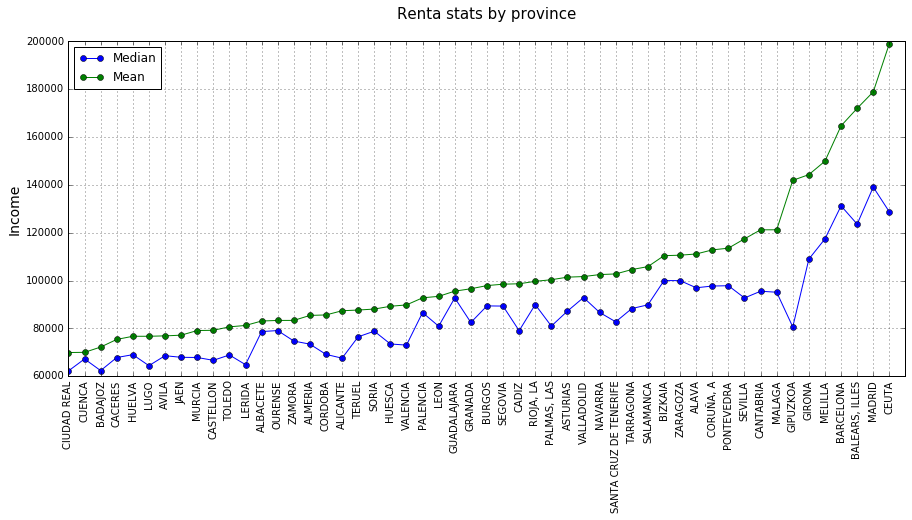

In [484]:
plt.figure(figsize=(15, 6))
plt.plot(median, '-o', mean, '-o')
plt.xlim(0,renta_by_prov.shape[0])
plt.xticks(range(len(serie)), serie.index, rotation=90)
plt.title('Renta stats by province\n', size=15)
plt.ylabel('Income', size=14)
#plt.fill_between(range(len(renta_stats.index)), mean-std, mean+std, color="y", alpha=0.2)
plt.grid()
plt.legend(['Median', 'Mean'], loc=2)

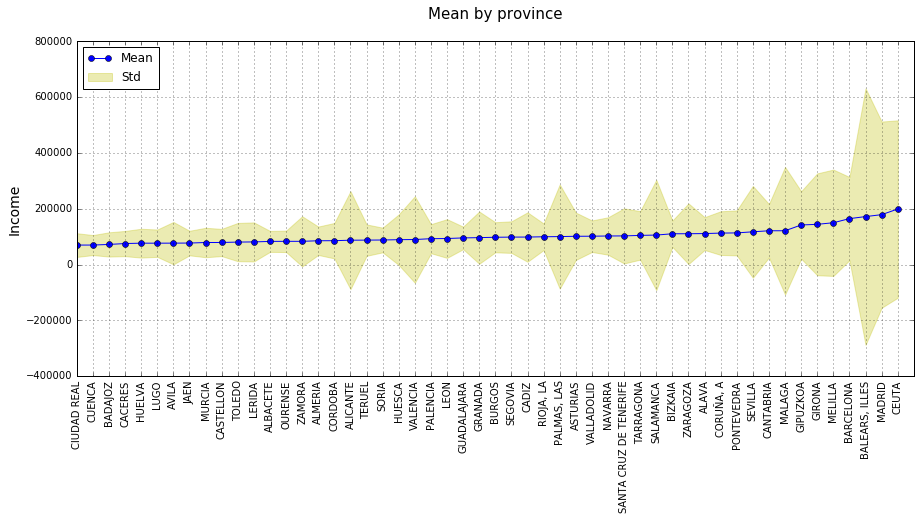

In [513]:
plt.figure(figsize=(15, 6))
plt.plot(mean, '-o')
plt.xlim(0,renta_by_prov.shape[0])
plt.xticks(range(len(serie)), serie.index, rotation=90)
plt.title('Mean by province\n', size=15)
plt.ylabel('Income', size=14)
plt.fill_between(range(len(renta_stats.index)), mean-std, mean+std, color="y", alpha=0.3)
plt.grid()
plt.legend(['Mean', 'Std'], loc=2)

### Renta por segmento y provincia

In [506]:
renta_by_seg = df.groupby(['nomprov', 'segmento']).agg({'renta': {'median_renta': 'median',
                                                                  'mean_renta': 'mean',
                                                                  'std_renta': 'std'}})
renta_by_seg.head()

renta                             
                            median_renta     std_renta     mean_renta
nomprov  segmento                                                    
ALAVA    01 - TOP               55271.07      0.000000   55271.070000
         02 - PARTICULARES     164007.12  56306.462542  145173.240000
         03 - UNIVERSITARIO     74453.79  38589.635985   89039.301429
ALBACETE 01 - TOP               88457.49  33504.004381   90440.961226
         02 - PARTICULARES      81777.15  38888.182150   85873.202656

In [490]:
ind_second_lvl = renta_by_seg.index.levels[1]

In [491]:
idx = pd.IndexSlice

In [492]:
medians = [renta_by_seg.loc[idx[:, [seg]], :][('renta', 'median_renta')] for seg in ind_second_lvl]
means = [renta_by_seg.loc[idx[:, [seg]], :][('renta', 'mean_renta')] for seg in ind_second_lvl]
stds = [renta_by_seg.loc[idx[:, [seg]], :][('renta', 'std_renta')] for seg in ind_second_lvl]

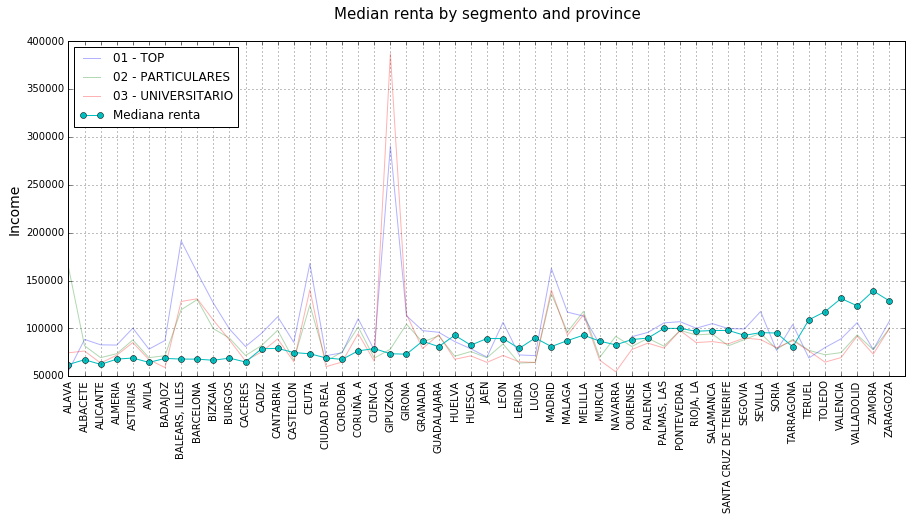

In [516]:
plt.figure(figsize=(15, 6))

for med in medians:
    plt.plot(med.values, '-', alpha=0.3, linewidth=1)
    
plt.plot(median, '-o', linewidth=1)
plt.xlim(0, len(med.values))
plt.xticks(range(len(med.values)), med.index.levels[0], rotation=90)
plt.title('Median renta by segmento and province\n', size=15)
plt.ylabel('Income', size=14)
plt.grid()
plt.legend(list(ind_second_lvl) + ['Mediana renta'], loc=2)

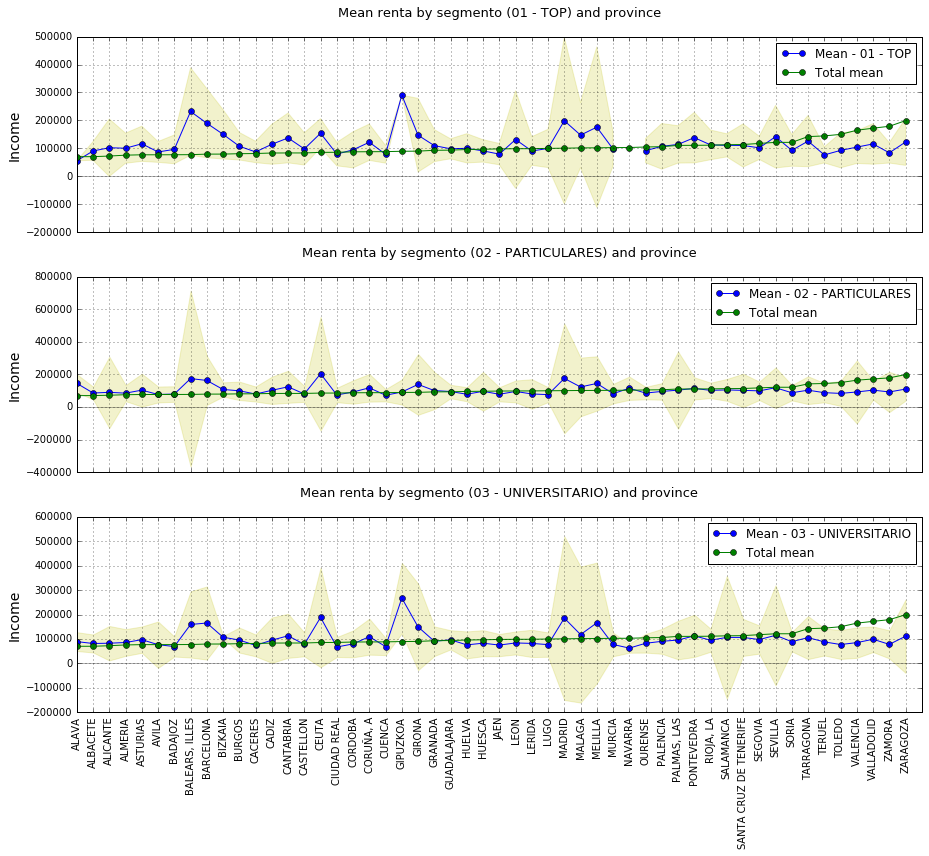

In [519]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(13, 12))
#plt.figure(figsize=(15, 6))
for i in range(len(means)):
    me = means[i]
    axes[i].plot(me.values, '-o')
    axes[i].plot(mean, '-o')
    axes[i].fill_between(range(len(renta_stats.index)), me.values-stds[i].values, me.values+stds[i].values, color="y",
                     alpha=0.2)
    axes[i].set_xlim(0, len(me.values))
    axes[i].set_title('Mean renta by segmento (' + ind_second_lvl[i] + ') and province\n', size=13)
    axes[i].set_ylabel('Income', size=14)
    axes[i].grid()
    axes[i].axhline(color='black', alpha=0.3)
    axes[i].legend(['Mean - ' + ind_second_lvl[i], 'Total mean'], loc=0)
plt.xticks(range(len(me.values)), me.index.levels[0], rotation=90);
plt.tight_layout()

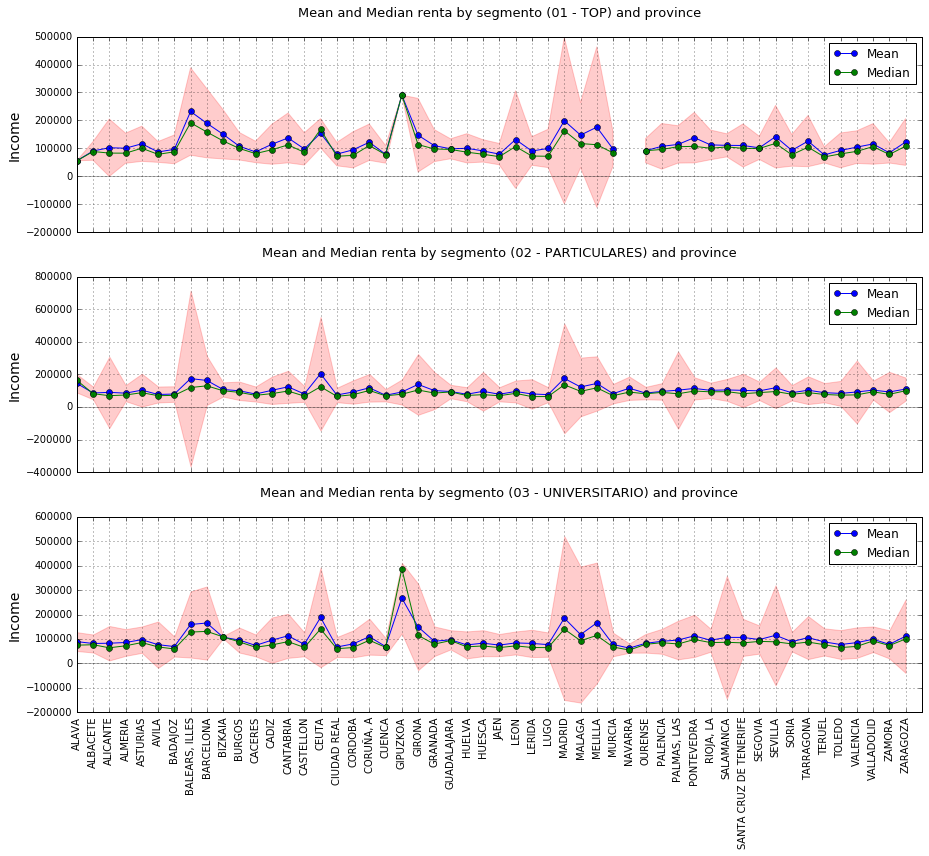

In [507]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(13, 12))
#plt.figure(figsize=(15, 6))
for i in range(len(means)):
    me = means[i]
    md = medians[i]
    axes[i].plot(me.values, '-o')
    axes[i].plot(md.values, '-o')
    axes[i].fill_between(range(len(renta_stats.index)), me.values-stds[i].values, me.values+stds[i].values, color="r",
                     alpha=0.2)
    axes[i].set_xlim(0, len(me.values))
    axes[i].set_title('Mean and Median renta by segmento (' + ind_second_lvl[i] + ') and province\n', size=13)
    axes[i].set_ylabel('Income', size=14)
    axes[i].grid()
    axes[i].legend(['Mean', 'Median'])
    axes[i].axhline(color='black', alpha=0.3)
#plt.legend(ind_second_lvl, loc=2)
plt.xticks(range(len(me.values)), me.index.levels[0], rotation=90);
plt.tight_layout()

**CONCLUSIÓN:** Se reemplazarán los valores faltantes de *renta* con la media que haya en cada provincia y según el segmento al que pertenezca el cliente